# **DESAFIO 02 - APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Desenvolver algoritmos de Regressão para o dataset: insurance.csv, que trata sobre custos médicos pessoais.

# **LEGENDA DO DATASET:**

**Atributos**

idade: idade do beneficiário principal

sexo: gênero do contratante de seguros, feminino, masculino

IMC: Índice de massa corporal, que fornece uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,
índice objetivo do peso corporal (kg / m ^ 2) usando a proporção entre altura e peso, idealmente 18,5 a 24,9

crianças: Número de crianças cobertas pelo seguro de saúde / Número de dependentes

fumante: Fumar

região: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

encargos: Custos médicos individuais cobrados pelo seguro de saúde

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

In [6]:
#Imports
import numpy as np
import pandas as pd

In [7]:

df = pd.read_csv('insurance.csv',
                    sep=',', encoding='UTF-8')

In [8]:
df.shape

(1338, 7)

In [9]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [10]:
# Renomeando as colunas.
df.columns = ['Idade', 'Sexo', 'Imc', 'Dependentes','Fumante', 'regiao', 'Encargos']

In [11]:
df.head()

Idade    Sexo     Imc  Dependentes Fumante     regiao     Encargos
0     19  female  27.900            0     yes  southwest  16884.92400
1     18    male  33.770            1      no  southeast   1725.55230
2     28    male  33.000            3      no  southeast   4449.46200
3     33    male  22.705            0      no  northwest  21984.47061
4     32    male  28.880            0      no  northwest   3866.85520

In [12]:
# Cria uma cópia do dataframe origonal para que não ocorra erros na transformação dos dos dados.
df2 = pd.DataFrame.copy(df)

In [13]:
# Mostra o número de linhas e colunas
df2.shape

(1338, 7)

In [14]:
# Veifica a quantidade de valores missing 
df2.isnull().sum()

Idade          0
Sexo           0
Imc            0
Dependentes    0
Fumante        0
regiao         0
Encargos       0
dtype: int64

In [15]:
# Mostra o tipo de dados. A variável dependente é a coluna: Encargos, informa os custos médicos
df2.dtypes

Idade            int64
Sexo            object
Imc            float64
Dependentes      int64
Fumante         object
regiao          object
Encargos       float64
dtype: object

In [16]:
df2.describe()

Idade          Imc  Dependentes      Encargos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Transforma em um arrau bi-dimensional
df3 = df2.iloc[:, 0:7].values
df3

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [19]:
df3.shape

(1338, 7)

In [20]:
df3[:,1] = LabelEncoder().fit_transform(df3[:,1])
df3[:,4] = LabelEncoder().fit_transform(df3[:,4])
df3[:,5] = LabelEncoder().fit_transform(df3[:,5])
df3

array([[19, 0, 27.9, ..., 1, 3, 16884.924],
       [18, 1, 33.77, ..., 0, 2, 1725.5523],
       [28, 1, 33.0, ..., 0, 2, 4449.462],
       ...,
       [18, 0, 36.85, ..., 0, 2, 1629.8335],
       [21, 0, 25.8, ..., 0, 3, 2007.945],
       [61, 0, 29.07, ..., 1, 1, 29141.3603]], dtype=object)

In [21]:
# Revertendo o dataset para o formato pandas.
df3 = pd.DataFrame(df3)
df3.columns = ['Idade', 'Sexo', 'Imc', 'Dependentes','Fumante', 'regiao', 'Encargos']
df3

Idade Sexo     Imc Dependentes Fumante regiao     Encargos
0       19    0    27.9           0       1      3    16884.924
1       18    1   33.77           1       0      2    1725.5523
2       28    1    33.0           3       0      2     4449.462
3       33    1  22.705           0       0      1  21984.47061
4       32    1   28.88           0       0      1    3866.8552
...    ...  ...     ...         ...     ...    ...          ...
1333    50    1   30.97           3       0      1   10600.5483
1334    18    0   31.92           0       0      0    2205.9808
1335    18    0   36.85           0       0      2    1629.8335
1336    21    0    25.8           0       0      3     2007.945
1337    61    0   29.07           0       1      1   29141.3603

[1338 rows x 7 columns]

In [22]:
df3.dtypes

Idade          object
Sexo           object
Imc            object
Dependentes    object
Fumante        object
regiao         object
Encargos       object
dtype: object

### **Análise dos outliers**

In [24]:
import plotly.express as px

In [25]:
boxplot = px.box(df3, x="Idade")
boxplot.show()

In [26]:
boxplot = px.box(df3, x="Imc")
boxplot.show()

In [27]:
boxplot = px.box(df3, x="Dependentes")
boxplot.show()

In [28]:
boxplot = px.box(df3, x="Encargos")
boxplot.show()

In [29]:
import seaborn as sns

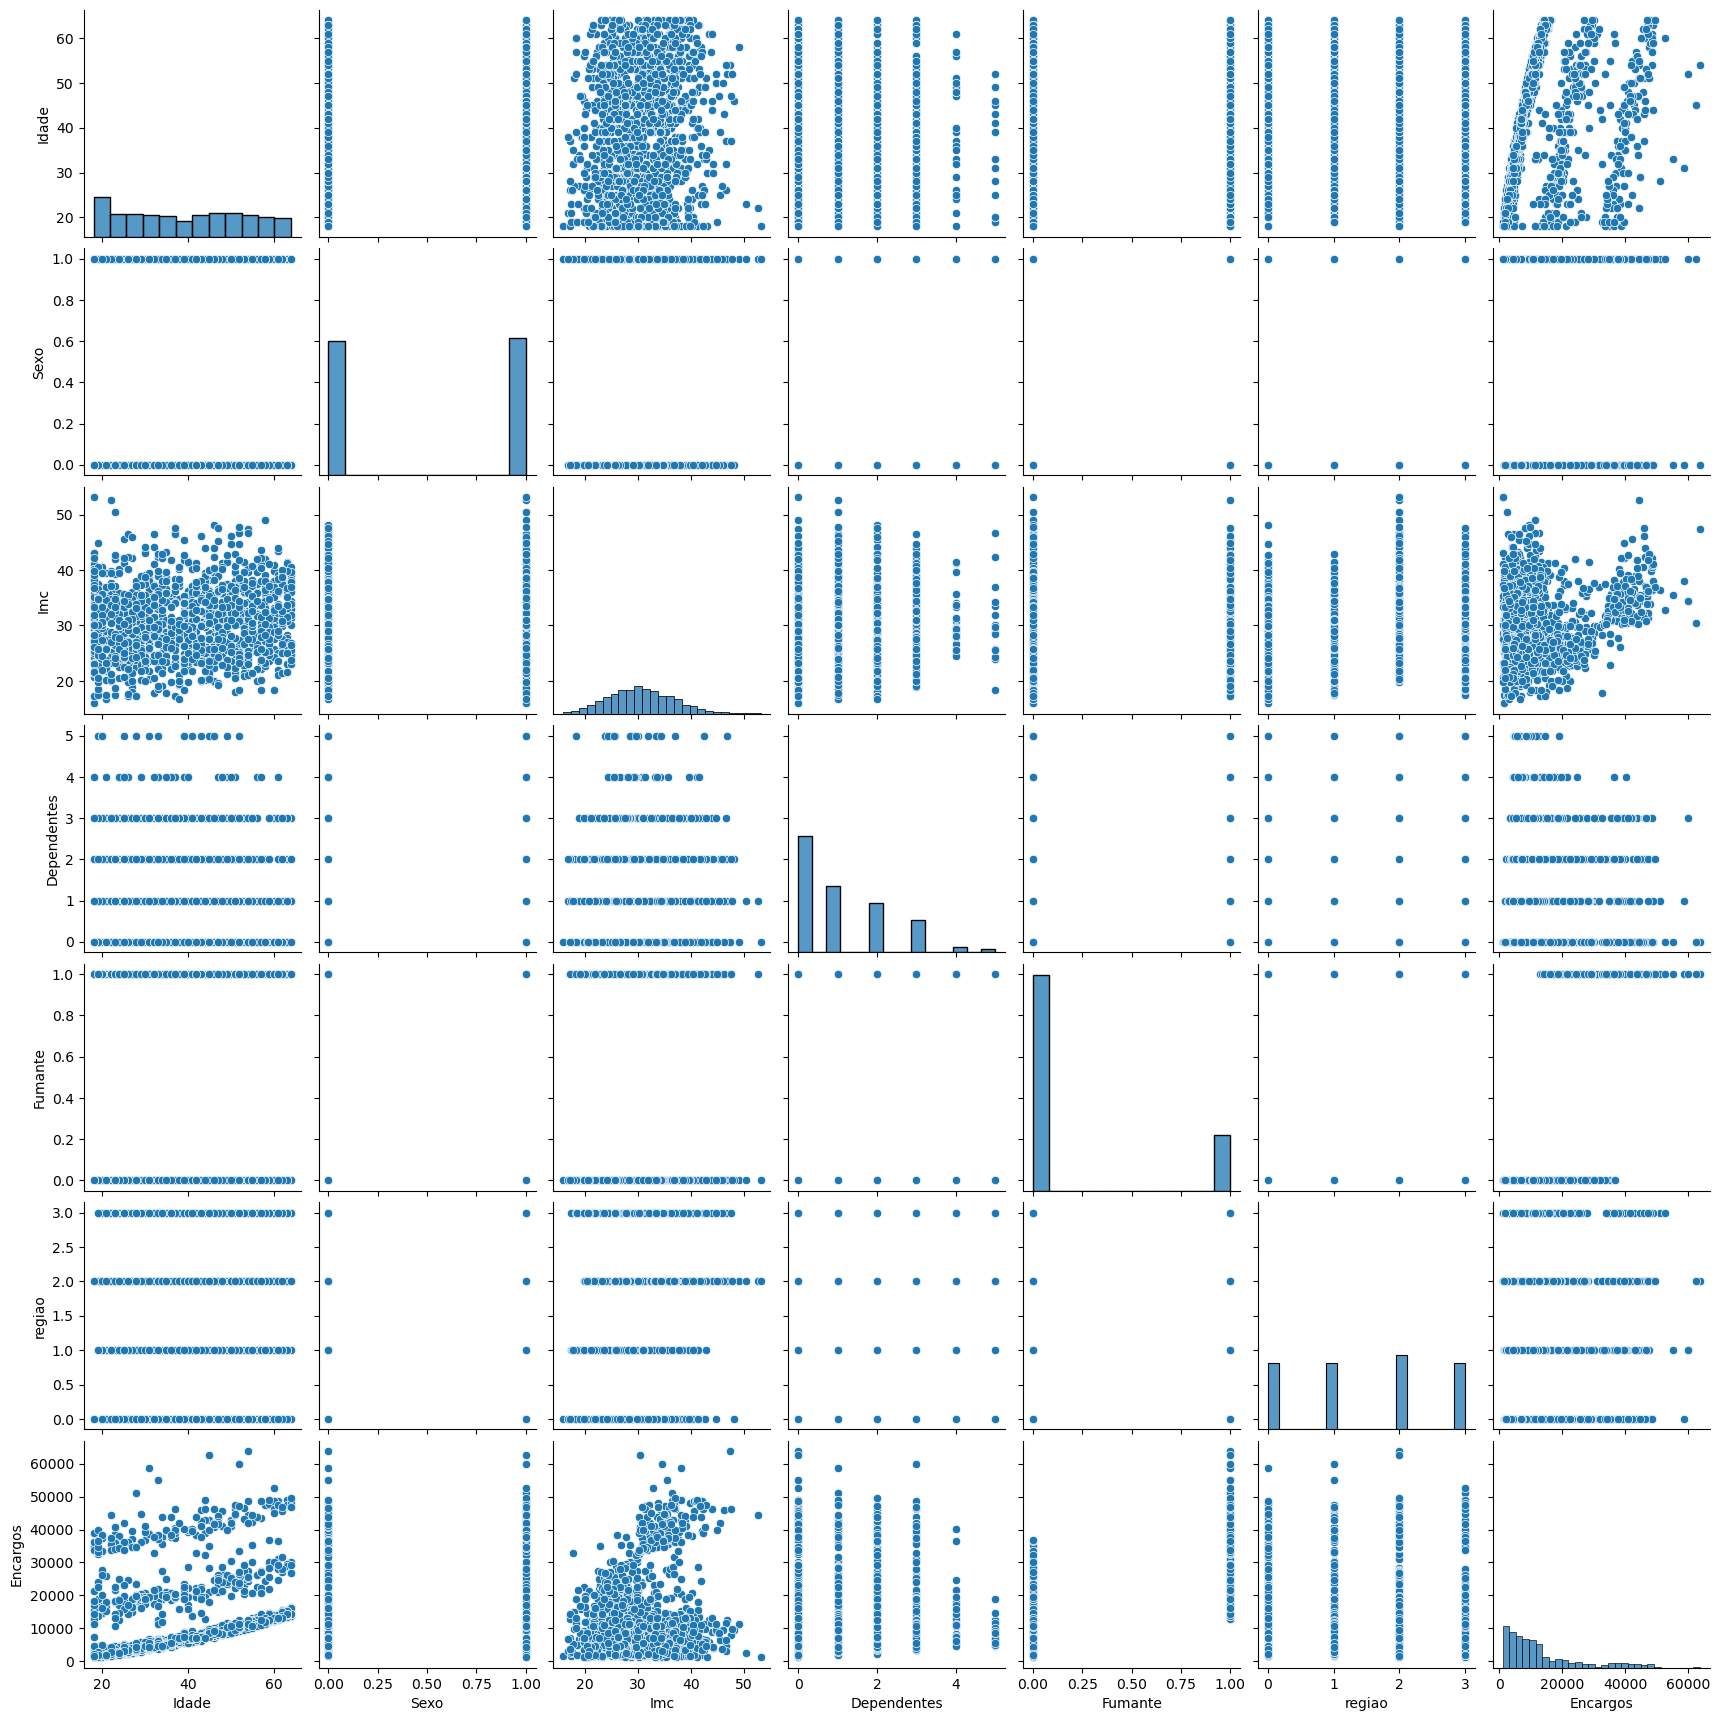

In [30]:
sns.pairplot(df3);

## **CORRELAÇÃO LINEAR**

### **Análise da Normalidade**

In [33]:
import scipy.stats as stats

In [34]:
import matplotlib.pyplot as plt

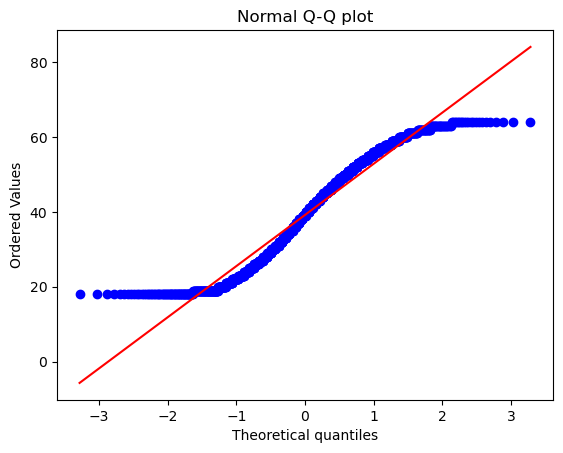

In [35]:
df3['Idade'] = pd.to_numeric(df3['Idade'], errors='coerce')
stats.probplot(df3['Idade'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

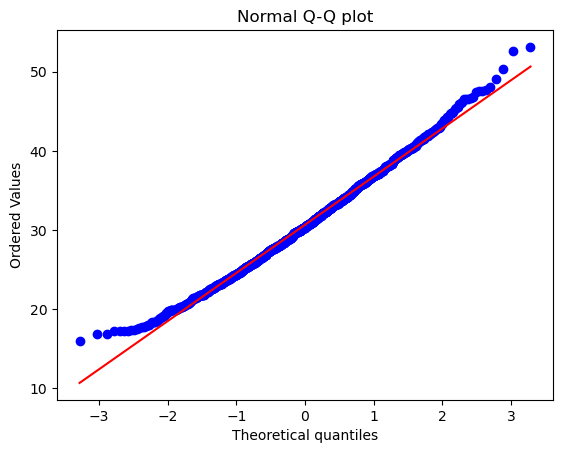

In [36]:
df3['Imc'] = pd.to_numeric(df3['Imc'], errors='coerce')
stats.probplot(df3['Imc'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

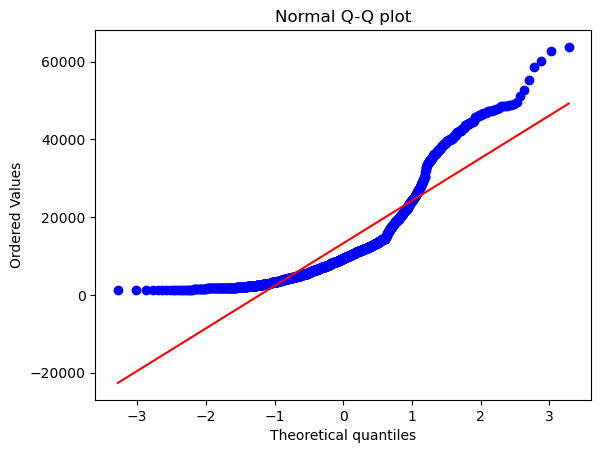

In [37]:
df3['Encargos'] = pd.to_numeric(df3['Encargos'], errors='coerce')
stats.probplot(df3['Encargos'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [38]:
import plotly.express as px

In [39]:
hist =  px.histogram (df3,  x = "Idade", nbins=90) 
hist.update_layout(width=800,height=500,title_text='Média de Idade') 
hist.show()

In [40]:
hist =  px.histogram (df3,  x = "Imc", nbins=90) 
hist.update_layout(width=800,height=500,title_text='Média do Imc') 
hist.show()

In [41]:
hist =  px.histogram (df3,  x = "Encargos", nbins=90) 
hist.update_layout(width=800,height=500,title_text='Média de Encargos') 
hist.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [43]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
estatistica, p = stats.shapiro(df3.Idade)
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.94470
Valor p: 0.00000
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


In [44]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [45]:
# Executando o teste de Kolmogorov_Sminorv para verificar a normalidade
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df3.Idade, dist = 'norm')
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.07894
Valor p: 0.00100
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


In [46]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
estatistica, p = stats.shapiro(df3.Imc)
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.99389
Valor p: 0.00003
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


In [47]:
# Executando o teste de Kolmogorov_Sminorv para verificar a normalidade
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df3.Imc, dist = 'norm')
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.02610
Valor p: 0.04431
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


In [48]:
# Executando o teste de Shapiro-Wilk para verificar a normalidade
estatistica, p = stats.shapiro(df3.Encargos)
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.81469
Valor p: 0.00000
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


In [49]:
# Executando o teste de Kolmogorov_Sminorv para verificar a normalidade
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df3.Encargos, dist = 'norm')
print(f'Estatística do teste: {estatistica:.5f}')
print(f'Valor p: {p:.5f}')
# Avaliando o p-valor para decidir sobre a normalidade dos dados
if p > 0.05:
    print("✅ Dados seguem uma distribuição normal (não rejeitamos H₀)")
else:
    print("❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)")

Estatística do teste: 0.18846
Valor p: 0.00100
❌ Dados NÃO seguem uma distribuição normal (rejeitamos H₀)


### **Correlação Linear**

Spearman (distribuição não normal)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05


In [52]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.Idade, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")


Coeficiente de correlação de Spearman: 0.53439
Valor p: 0.00000
❌ Há uma correlação estatisticamente significativa entre as variáveis.
📊 A correlação é moderada e positiva.


In [53]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.Sexo, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")

Coeficiente de correlação de Spearman: 0.00949
Valor p: 0.72874
✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).


In [54]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.Imc, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")

Coeficiente de correlação de Spearman: 0.11940
Valor p: 0.00001
❌ Há uma correlação estatisticamente significativa entre as variáveis.
📊 A correlação é fraca e positiva.


In [55]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.Dependentes, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")

Coeficiente de correlação de Spearman: 0.13334
Valor p: 0.00000
❌ Há uma correlação estatisticamente significativa entre as variáveis.
📊 A correlação é fraca e positiva.


In [56]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.Fumante, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")

Coeficiente de correlação de Spearman: 0.66346
Valor p: 0.00000
❌ Há uma correlação estatisticamente significativa entre as variáveis.
📊 A correlação é moderada e positiva.


In [57]:
# Calculando Spearman
coef, p = stats.spearmanr(df3.regiao, df3.Encargos)
# Exibindo os resultados
print(f'Coeficiente de correlação de Spearman: {coef:.5f}')
print(f'Valor p: {p:.5f}')
# Interpretando o p-valor
if p > 0.05:
    print("✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).")
else:
    print("❌ Há uma correlação estatisticamente significativa entre as variáveis.")
        # Avaliando a força da correlação
    abs_coef = abs(coef)  # Consideramos o valor absoluto para avaliar a intensidade
    if abs_coef < 0.3:
        interpretacao = "fraca"
    elif abs_coef < 0.7:
        interpretacao = "moderada"
    else:
        interpretacao = "forte"
    # Direção da correlação
    direcao = "positiva" if coef > 0 else "negativa"

    print(f"📊 A correlação é {interpretacao} e {direcao}.")

Coeficiente de correlação de Spearman: -0.04353
Valor p: 0.11148
✅ Não há evidências suficientes para rejeitar a hipótese nula (sem correlação significativa).


In [58]:
correlacoes = df3.corr(method='spearman')
correlacoes

Idade      Sexo       Imc  Dependentes   Fumante    regiao  \
Idade        1.000000 -0.020809  0.107736     0.056992 -0.025210  0.004315   
Sexo        -0.020809  1.000000  0.044802     0.015589  0.076185  0.004614   
Imc          0.107736  0.044802  1.000000     0.015607  0.002203  0.152959   
Dependentes  0.056992  0.015589  0.015607     1.000000  0.016583  0.010604   
Fumante     -0.025210  0.076185  0.002203     0.016583  1.000000 -0.002155   
regiao       0.004315  0.004614  0.152959     0.010604 -0.002155  1.000000   
Encargos     0.534392  0.009490  0.119396     0.133339  0.663460 -0.043531   

             Encargos  
Idade        0.534392  
Sexo         0.009490  
Imc          0.119396  
Dependentes  0.133339  
Fumante      0.663460  
regiao      -0.043531  
Encargos     1.000000

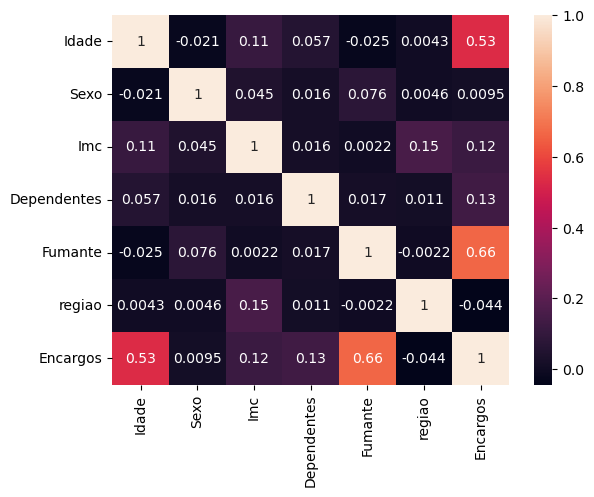

In [59]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

Com base nas analises de correlação linear, será considerado as variáveis: Idade, Imc, Dependentes e Fumante como previsores, pelo motivo que foi detectado correlação dos dados com a variável alvo: Encargos

### **Atributos previsores**

- Idade	
- Imc	
- Dependentes	
- Fumante	


### **Variável alvo**

- Encargos

## **REGRESSÃO LINEAR SIMPLES**

### **Encargos em função a Idade**

In [67]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [68]:
# Seleciona apenas a coluna Idade.
x1 = df3.iloc[:,0:1].values
x1

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [69]:
# Seleciona apenas a coluna Encargos
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [70]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [71]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [72]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [75]:
# Intercepto (coeficiente linear)
print(f"Intercepto: {reg_linear1.intercept_}")

Intercepto: 2428.663437987356


In [76]:
# Coeficiente Angular
print(f"Coeficiente Angular: {reg_linear1.coef_}")


Coeficiente Angular: [281.01394743]


**Equação: Valor = 2428.66 + 281.01 x (Multiplica por) Idade**

In [78]:
# Coeficiente de Determinação dados de treino
print(f"Coeficiente de Determinação dados de treino: {reg_linear1.score(x_treino, y_treino)}")

Coeficiente de Determinação dados de treino: 0.10386818385382768


In [79]:
# Coeficiente de Determinação dados de teste
print(f"Coeficiente de Determinação dados de teste: {reg_linear1.score(x_teste, y_teste)}")

Coeficiente de Determinação dados de teste: 0.04432028433481028


In [80]:
# Dados treino
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 8329.95633412, 10297.05396616, 18446.45844177,  8329.95633412,
       12545.16554564, 13107.19344051, 13388.20738794, 20132.54212637,
        8329.95633412, 12826.17949307, 20413.55607381, 17884.4305469 ,
       17041.38870459,  8610.97028155, 13107.19344051, 14512.26317768,
       13669.22133538,  8610.97028155,  7767.92843925, 10016.04001872,
       13388.20738794, 17603.41659946, 18727.4723892 , 20132.54212637,
       20413.55607381, 13669.22133538, 17041.38870459,  7486.91449181,
       12264.1515982 , 14793.27712511,  8329.95633412, 14231.24923025,
       15917.33291485, 12826.17949307, 19851.52817894, 18727.4723892 ,
        7767.92843925, 17322.40265203,  7767.92843925, 11140.09580846,
       12826.17949307,  9735.02607129, 18165.44449433, 17884.4305469 ,
        8048.94238668, 10016.04001872, 16198.34686229, 10859.08186103,
       19851.52817894, 19289.50028407, 13107.19344051,  7767.92843925,
        8610.97028155, 12264.1515982 , 20413.55607381, 14231.24923025,
      

In [81]:
import matplotlib.pyplot as plt

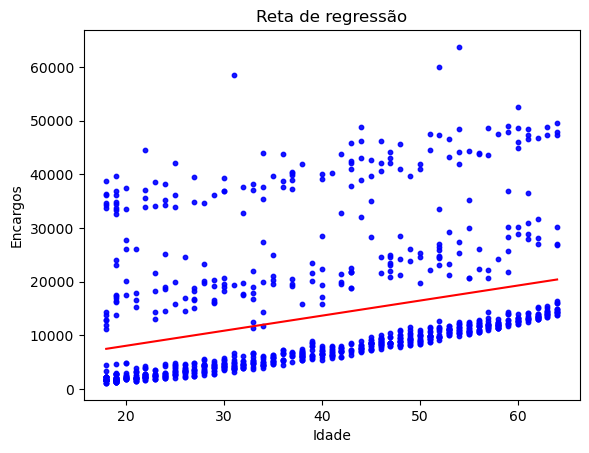

In [82]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(x_treino.min(), x_treino.max(), 100)
plt.plot(X_plot, X_plot * reg_linear1.coef_[0] + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Idade')
plt.show()

In [83]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([12826.17949307, 12545.16554564, 19008.48633664, 19570.51423151,
       10578.06791359, 13950.23528281, 15074.29107255,  8048.94238668,
       14793.27712511, 14512.26317768,  8329.95633412,  9735.02607129,
       14512.26317768, 13950.23528281, 15917.33291485, 19289.50028407,
        9454.01212386, 20132.54212637, 18165.44449433, 12545.16554564,
       14793.27712511,  7767.92843925,  7486.91449181, 13107.19344051,
       10297.05396616, 19008.48633664, 14793.27712511, 17603.41659946,
        9735.02607129, 13388.20738794,  7767.92843925, 13388.20738794,
       15074.29107255, 14793.27712511, 10578.06791359, 12264.1515982 ,
       19851.52817894, 17041.38870459, 16479.36080972, 14793.27712511,
       20132.54212637, 16479.36080972, 12545.16554564, 14793.27712511,
        7486.91449181, 14231.24923025, 15636.31896742, 13950.23528281,
       19008.48633664, 18165.44449433,  8891.98422899, 10297.05396616,
       15074.29107255, 18727.4723892 , 17322.40265203, 19570.51423151,
      

In [84]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

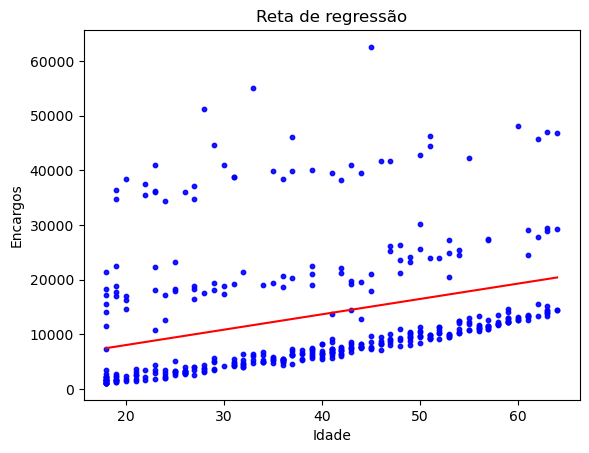

In [85]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
Y_plot = np.linspace(x_teste.min(), x_teste.max(), 100)
plt.plot(Y_plot, Y_plot * reg_linear1.coef_[0] + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Idade')
plt.show()

### **Previsões para Idade**

In [87]:
# Fazendo previsões para idade até 20 anos
IdadeMax = 1  
while IdadeMax <= 20:  
    ValorCusto = reg_linear1.predict([[IdadeMax]])
    valor_custo_formatado = f"${ValorCusto[0]:,.2f}"
    print(f"Idade: {IdadeMax} - Encargos: {valor_custo_formatado}")
    IdadeMax += 1  

Idade: 1 - Encargos: $2,709.68
Idade: 2 - Encargos: $2,990.69
Idade: 3 - Encargos: $3,271.71
Idade: 4 - Encargos: $3,552.72
Idade: 5 - Encargos: $3,833.73
Idade: 6 - Encargos: $4,114.75
Idade: 7 - Encargos: $4,395.76
Idade: 8 - Encargos: $4,676.78
Idade: 9 - Encargos: $4,957.79
Idade: 10 - Encargos: $5,238.80
Idade: 11 - Encargos: $5,519.82
Idade: 12 - Encargos: $5,800.83
Idade: 13 - Encargos: $6,081.84
Idade: 14 - Encargos: $6,362.86
Idade: 15 - Encargos: $6,643.87
Idade: 16 - Encargos: $6,924.89
Idade: 17 - Encargos: $7,205.90
Idade: 18 - Encargos: $7,486.91
Idade: 19 - Encargos: $7,767.93
Idade: 20 - Encargos: $8,048.94


### **Métricas de Desempenho**

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

8829.869512552257

In [91]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

8829.869512552257

In [92]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

124102543.68297596

In [93]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11140.13212143267

### **Encargos em função a Imc**

In [95]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [96]:
x2 = df.iloc[:,2:3].values
x2

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [97]:
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [98]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [99]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [100]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [101]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [102]:
# Intercepto (coeficiente linear)
print(f"Intercepto: {reg_linear2.intercept_}")

Intercepto: 84.68050484714331


In [103]:
# Coeficiente Angular
print(f"Coeficiente Angular: {reg_linear2.coef_}")

Coeficiente Angular: [433.29493259]


**Equação: Valor = 84.68 - 433.30 x (Multiplica por ) Encargos**

In [105]:
# Coeficiente de Determinação dados de treino
print(f"Coeficiente de Determinação dados de treino: {reg_linear2.score(x_treino, y_treino)}")

Coeficiente de Determinação dados de treino: 0.04731455322378331


In [106]:
# Coeficiente de Determinação dados de teste
print(f"Coeficiente de Determinação dados de teste: {reg_linear2.score(x_teste, y_teste)}")

Coeficiente de Determinação dados de teste: 0.013821597073977787


In [107]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([ 7370.5347963 , 16575.88563912, 19019.66905891, 13525.4893137 ,
       12021.95589763, 13382.50198595, 14296.75429371, 14669.38793574,
       11263.6897656 , 15765.62411518, 13133.35739971, 12063.11891622,
       10856.39252897,  9305.1966703 , 12216.93861729, 13133.35739971,
       12268.9340092 , 16385.23586878, 12351.26004639, 13300.17594876,
       19769.26929229, 12063.11891622, 15891.27964563, 11445.67363729,
       15033.35567911,  9922.64194924, 14860.03770607, 10189.11833278,
       12606.90405662, 12968.70532533, 11220.36027234, 17576.7969334 ,
       15932.44266423, 14862.20418074, 13298.0094741 , 16549.88794316,
       10745.90232116, 14862.20418074, 15423.32111844, 11618.99161032,
       12996.86949595,  9097.21510266, 12474.74910218, 15356.16040389,
       12186.60797201,  9387.5227075 , 14080.10682742, 16909.52273721,
       16055.93172001, 12474.74910218, 15163.34415888, 11157.53250712,
       17331.98529648, 14955.36259124, 17286.48932856, 10210.78307941,
      

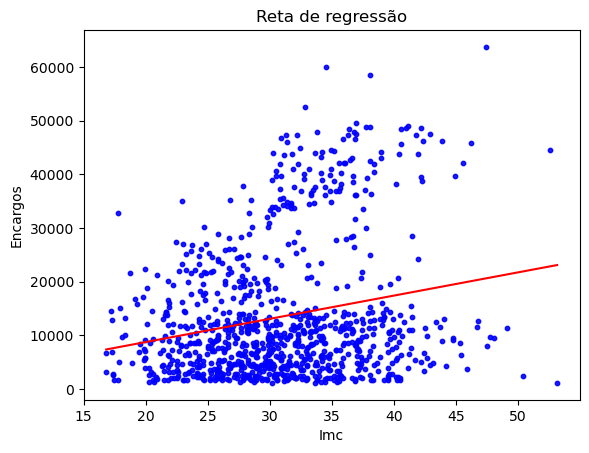

In [108]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(x_treino.min(), x_treino.max(), 100)
plt.plot(X_plot, X_plot * reg_linear2.coef_[0] + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Imc')
plt.show()

In [109]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([12104.28193482, 11733.81476746, 16159.92250384, 10951.71741414,
       11363.34760009, 13791.96569725, 10618.08031604, 11714.31649549,
       10475.09298829,  8770.07742856, 10375.4351538 , 12557.07513937,
       11363.34760009, 14450.57399478, 15644.30153406, 10498.92420958,
       14812.37526349, 17329.81882182, 11870.30267122, 12227.77099061,
       13668.47664146, 15314.99738529, 11486.83665588, 11898.46684184,
       11571.32916774, 13668.47664146, 16159.92250384,  9387.5227075 ,
       14903.36719933, 12346.92709707,  8663.92017008, 15379.99162518,
       13859.1264118 ,  9675.66383767, 16957.1851798 , 18863.68288318,
       13092.19438112, 15986.6045308 , 11939.62986044, 11956.96165774,
       16051.59877069, 11075.20646992, 11281.0215629 , 15891.27964563,
       17910.43403149, 11428.34183998,  8399.6102612 , 13421.49852988,
       10787.06533975, 11198.69552571, 18608.03887295, 14431.07572281,
       14686.71973304, 13874.29173444, 13668.47664146, 13763.80152663,
      

In [110]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

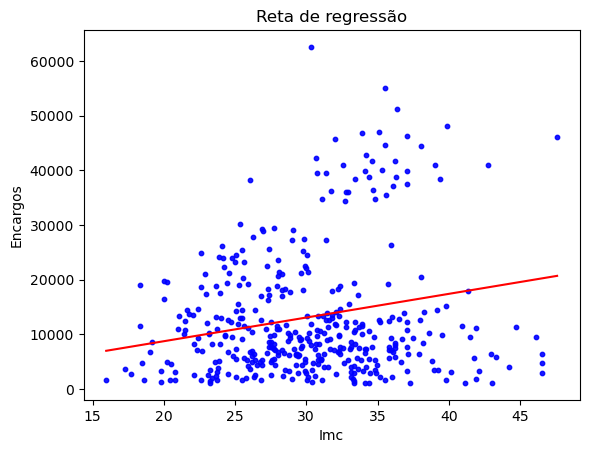

In [111]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
Y_plot = np.linspace(x_teste.min(), x_teste.max(), 100)
plt.plot(Y_plot, Y_plot * reg_linear2.coef_[0] + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Imc')
plt.show()

### **Previsões para Imc**

In [113]:
# Fazendo previsões para IMC de 29.90 e 33.77
imc_valores = [29.90, 33.77]  

for imc in imc_valores:
    previsao = reg_linear2.predict([[imc]])  
    previsao_formatada = f"${previsao[0]:,.2f}"  
    print(f"Previsão para o valor de {imc}: {previsao_formatada}")

Previsão para o valor de 29.9: $13,040.20
Previsão para o valor de 33.77: $14,717.05


### **Métricas de Desempenho**

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [116]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

8749.14156999775

In [117]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

8749.14156999775

In [118]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

128063038.61241621

### **Encargos em função a Dependentes**

In [120]:
df3.head()

Idade Sexo     Imc Dependentes Fumante regiao     Encargos
0     19    0  27.900           0       1      3  16884.92400
1     18    1  33.770           1       0      2   1725.55230
2     28    1  33.000           3       0      2   4449.46200
3     33    1  22.705           0       0      1  21984.47061
4     32    1  28.880           0       0      1   3866.85520

In [121]:
x3 = df.iloc[:,3:4].values
x3

array([[0],
       [1],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [122]:
y = df.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [123]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x3, y, test_size = 0.3, random_state = 10)

In [124]:
x_treino.shape, x_teste.shape

((936, 1), (402, 1))

In [125]:
 y_treino.shape, y_teste.shape

((936,), (402,))

In [126]:
from sklearn.linear_model import LinearRegression
reg_linear3 = LinearRegression()
reg_linear3.fit(x_treino, y_treino)

LinearRegression()

In [127]:
# Intercepto (coeficiente linear)
print(f"Intercepto: {reg_linear3.intercept_}")

Intercepto: 12790.083882666477


In [128]:
# Coeficiente Angular
print(f"Coeficiente Angular: {reg_linear3.coef_}")

Coeficiente Angular: [615.43095946]


**Equação: Valor = 12790.08 - 615.43 x (Multiplica por ) Dependentes**

In [130]:
# Coeficiente de Determinação dados de treino
print(f"Coeficiente de Determinação dados de treino: {reg_linear3.score(x_treino, y_treino)}")

Coeficiente de Determinação dados de treino: 0.003573528067205345


In [131]:
# Coeficiente de Determinação dados de teste
print(f"Coeficiente de Determinação dados de teste: {reg_linear3.score(x_teste, y_teste)}")

Coeficiente de Determinação dados de teste: 0.004507581130391403


In [132]:
previsoes_treino = reg_linear3.predict(x_treino)
previsoes_treino

array([13405.51484213, 12790.08388267, 13405.51484213, 12790.08388267,
       14636.37676106, 13405.51484213, 12790.08388267, 14636.37676106,
       12790.08388267, 12790.08388267, 14636.37676106, 12790.08388267,
       12790.08388267, 14636.37676106, 14636.37676106, 14636.37676106,
       13405.51484213, 13405.51484213, 12790.08388267, 12790.08388267,
       14020.9458016 , 13405.51484213, 12790.08388267, 12790.08388267,
       12790.08388267, 14020.9458016 , 12790.08388267, 13405.51484213,
       14636.37676106, 14020.9458016 , 15251.80772053, 14020.9458016 ,
       12790.08388267, 13405.51484213, 14020.9458016 , 12790.08388267,
       13405.51484213, 12790.08388267, 12790.08388267, 12790.08388267,
       12790.08388267, 12790.08388267, 12790.08388267, 13405.51484213,
       12790.08388267, 12790.08388267, 14636.37676106, 13405.51484213,
       13405.51484213, 12790.08388267, 14020.9458016 , 12790.08388267,
       12790.08388267, 14636.37676106, 12790.08388267, 12790.08388267,
      

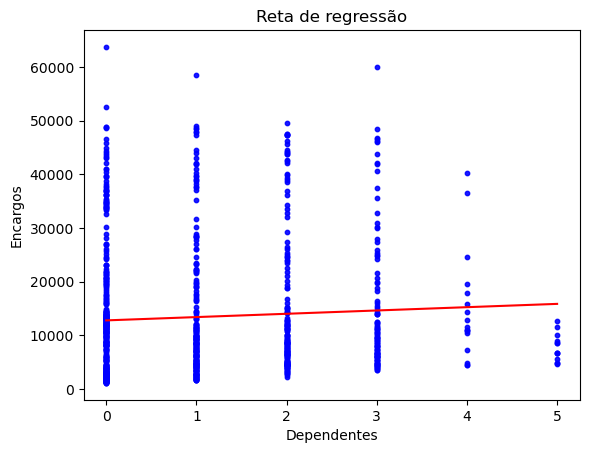

In [133]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(x_treino.min(), x_treino.max(), 100)
plt.plot(X_plot, X_plot * reg_linear3.coef_[0] + reg_linear3.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Dependentes')
plt.show()

In [134]:
previsoes_teste = reg_linear3.predict(x_teste)
previsoes_teste

array([14636.37676106, 12790.08388267, 13405.51484213, 12790.08388267,
       12790.08388267, 13405.51484213, 15867.23867999, 13405.51484213,
       14020.9458016 , 14020.9458016 , 14020.9458016 , 12790.08388267,
       12790.08388267, 14636.37676106, 13405.51484213, 12790.08388267,
       13405.51484213, 14636.37676106, 12790.08388267, 13405.51484213,
       13405.51484213, 12790.08388267, 12790.08388267, 13405.51484213,
       14020.9458016 , 12790.08388267, 14020.9458016 , 14636.37676106,
       14020.9458016 , 13405.51484213, 12790.08388267, 14020.9458016 ,
       12790.08388267, 14020.9458016 , 13405.51484213, 14020.9458016 ,
       12790.08388267, 12790.08388267, 12790.08388267, 14020.9458016 ,
       12790.08388267, 14020.9458016 , 12790.08388267, 12790.08388267,
       12790.08388267, 13405.51484213, 13405.51484213, 14636.37676106,
       12790.08388267, 12790.08388267, 13405.51484213, 12790.08388267,
       13405.51484213, 14020.9458016 , 12790.08388267, 12790.08388267,
      

In [135]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

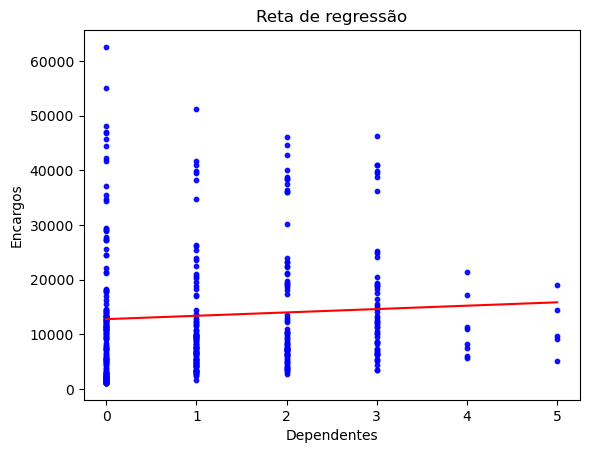

In [136]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
Y_plot = np.linspace(x_teste.min(), x_teste.max(), 100)
plt.plot(Y_plot, Y_plot * reg_linear3.coef_[0] + reg_linear3.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Dependentes')
plt.show()

### **Previsões para quant. de dependentes**

In [138]:
# Fazendo previsões para quantidade de dependentes: 5
qTDep = 1  
while qTDep <= 5:  
    ValorCusto = reg_linear3.predict([[qTDep]])
    valor_custo_formatado = f"${ValorCusto[0]:,.2f}"
    print(f"Quant. Dependentes: {qTDep} - Encargos: {valor_custo_formatado}")
    qTDep += 1  

Quant. Dependentes: 1 - Encargos: $13,405.51
Quant. Dependentes: 2 - Encargos: $14,020.95
Quant. Dependentes: 3 - Encargos: $14,636.38
Quant. Dependentes: 4 - Encargos: $15,251.81
Quant. Dependentes: 5 - Encargos: $15,867.24


**Métricas de Desempenho**

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [141]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

8605.689198027467

In [142]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

8605.689198027467

In [143]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

129272536.99514405

In [144]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11369.808133611756

### **Encargos em função de fumantes**

In [146]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [147]:
x4 = df3.iloc[:,4:5].values
x4

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [148]:
y = df3.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [149]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x4, y, test_size = 0.3, random_state = 10)

In [150]:
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((936, 1), (402, 1), (936,), (402,))

In [151]:
from sklearn.linear_model import LinearRegression
reg_linear4 = LinearRegression()
reg_linear4.fit(x_treino, y_treino)

LinearRegression()

In [152]:
# Intercepto (coeficiente linear)
print(f"Intercepto: {reg_linear4.intercept_}")

Intercepto: 8478.768873714675


In [153]:
# Coeficiente Angular
print(f"Coeficiente Angular: {reg_linear4.coef_}")

Coeficiente Angular: [24100.71108188]


In [154]:
# Coeficiente de Determinação dados de treino
print(f"Coeficiente de Determinação dados de treino: {reg_linear4.score(x_treino, y_treino)}")

Coeficiente de Determinação dados de treino: 0.6189465597859612


In [155]:
# Coeficiente de Determinação dados de teste
print(f"Coeficiente de Determinação dados de teste: {reg_linear3.score(x_teste, y_teste)}")

Coeficiente de Determinação dados de teste: 0.03375411304046061


In [156]:
previsoes_treino = reg_linear4.predict(x_treino)
previsoes_treino

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
       32579.4799556 , 32579.4799556 , 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371, 32579.4799556 , 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
      

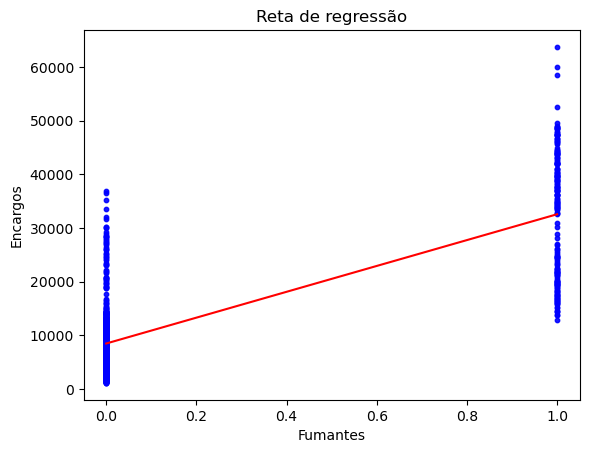

In [157]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(x_treino.min(), x_treino.max(), 100)
plt.plot(X_plot, X_plot * reg_linear4.coef_[0] + reg_linear4.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Fumantes')
plt.show()

In [158]:
previsoes_teste = reg_linear4.predict(x_teste)
previsoes_teste

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
       32579.4799556 ,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371, 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
      

In [159]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

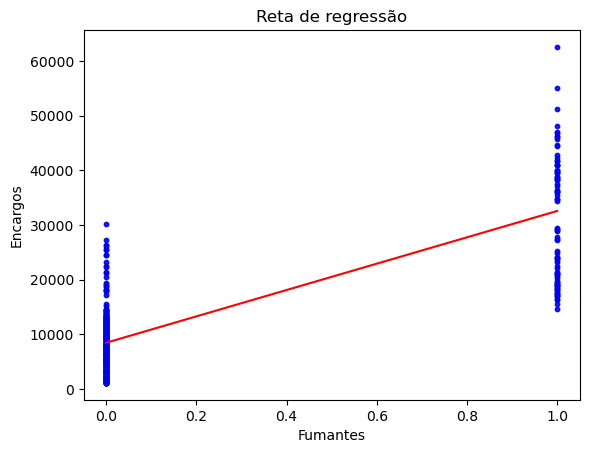

In [160]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
Y_plot = np.linspace(x_teste.min(), x_teste.max(), 100)
plt.plot(Y_plot, Y_plot * reg_linear4.coef_[0] + reg_linear4.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Fumantes')
plt.show()

### **Previsões para fumantes**

In [162]:
# Fazendo previsões para fumantes (0: Não - 1: Sim)
Fumantes = {'Não Fumante': 0, 'Fumante': 1}  
for chave, f in Fumantes.items():
    previsao = reg_linear4.predict([[f]])  
    previsao_formatada = f"${previsao[0]:,.2f}"
    print(f"Previsão para {chave}: {previsao_formatada}")

Previsão para Não Fumante: $8,478.77
Previsão para Fumante: $32,579.48


**Métricas de Desempenho**

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

5361.4579431801685

In [166]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

5361.4579431801685

In [167]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

49373234.71633605

In [168]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

7026.6090482064

### **Validação Cruzada**

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [171]:
# Separando os dados em folds
kfold = KFold(n_splits = 20, shuffle=True, random_state = 5)

In [172]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
reg_linear4 = LinearRegression()
modelo = LinearRegression()
resultado = cross_val_score(modelo, x4, y, cv = kfold)
resultado

array([0.6649421 , 0.56802531, 0.6907359 , 0.66408619, 0.51487045,
       0.59718091, 0.51383704, 0.63185756, 0.64942594, 0.52756563,
       0.5348772 , 0.59572744, 0.61831895, 0.61633916, 0.61956049,
       0.61184861, 0.7018256 , 0.6810683 , 0.65211545, 0.48434048])

In [173]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 60.69%


### **Avaliando a Regressão Linear Simples com Statsmodels**

In [175]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [176]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [177]:
x4 = df3.iloc[:,4:5].values
x4

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [178]:
y = df3.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [179]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x4, y, test_size = 0.3, random_state = 10)

In [180]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [181]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [182]:
from sklearn.linear_model import LinearRegression
reg_linear4 = LinearRegression()
reg_linear4.fit(x_treino, y_treino)

LinearRegression()

In [183]:
# Intercepto (coeficiente linear)
reg_linear4.intercept_

8478.768873714675

In [184]:
# Coeficiente Angular
reg_linear4.coef_

array([24100.71108188])

In [185]:
# Coeficiente de Determinação dados de treino
reg_linear4.score(x_treino, y_treino)

0.6189465597859612

In [186]:
previsoes_treino = reg_linear4.predict(x_treino)
previsoes_treino

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
       32579.4799556 , 32579.4799556 , 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371, 32579.4799556 , 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
      

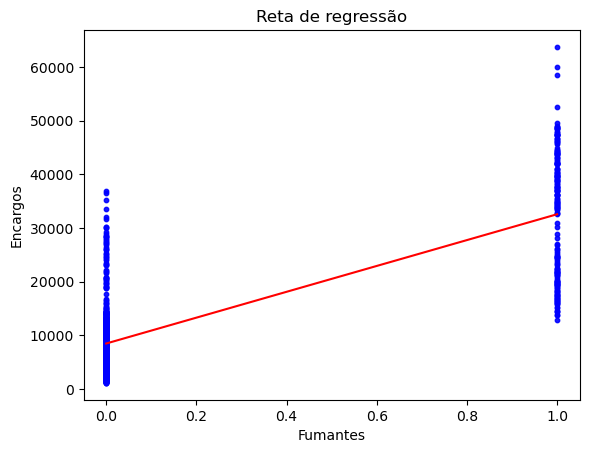

In [187]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(x_treino.min(), x_treino.max(), 100)
plt.plot(X_plot, X_plot * reg_linear4.coef_[0] + reg_linear4.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Fumantes')
plt.show()

In [188]:
previsoes_teste = reg_linear4.predict(x_teste)
previsoes_teste

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
       32579.4799556 ,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371, 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
      

In [189]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

In [190]:
# Coeficiente de Determinação dados de teste
reg_linear4.score(x_teste, y_teste)

0.6197902354385714

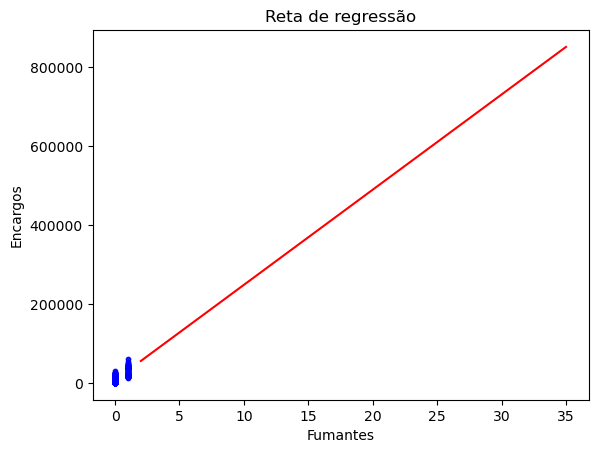

In [191]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear4.coef_ + reg_linear4.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Encargos')
plt.xlabel('Fumantes')
plt.show()

### **Previsões para fumantes**

In [193]:
# Fazendo previsões para fumantes (0: Não - 1: Sim)
Fumantes = {'Não Fumante': 0, 'Fumante': 1}  
for chave, f in Fumantes.items():
    previsao = reg_linear4.predict([[f]])  
    previsao_formatada = f"${previsao[0]:,.2f}"
    print(f"Previsão para {chave}: {previsao_formatada}")

Previsão para Não Fumante: $8,478.77
Previsão para Fumante: $32,579.48


**Métricas de Desempenho**

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [196]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

5361.4579431801685

In [197]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

5361.4579431801685

In [198]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

49373234.71633605

In [199]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

7026.6090482064

### **Validação Cruzada**

In [201]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [202]:
# Separando os dados em folds
kfold = KFold(n_splits = 20, shuffle=True, random_state = 5)

In [203]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x4, y, cv = kfold)
resultado

array([0.6649421 , 0.56802531, 0.6907359 , 0.66408619, 0.51487045,
       0.59718091, 0.51383704, 0.63185756, 0.64942594, 0.52756563,
       0.5348772 , 0.59572744, 0.61831895, 0.61633916, 0.61956049,
       0.61184861, 0.7018256 , 0.6810683 , 0.65211545, 0.48434048])

In [204]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 60.69%


**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada: 60.69%

## **REGRESSÃO LINEAR MÚLTIPLA**

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [209]:
independente = df3.iloc[:, 0:5].values
independente

array([[19, 0, 27.9, 0, 1],
       [18, 1, 33.77, 1, 0],
       [28, 1, 33.0, 3, 0],
       ...,
       [18, 0, 36.85, 0, 0],
       [21, 0, 25.8, 0, 0],
       [61, 0, 29.07, 0, 1]], dtype=object)

In [210]:
dependente = df3.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [211]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [212]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [213]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [214]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [215]:
multipla.intercept_

-12057.244845998539

In [216]:
multipla.coef_

array([  257.8006705 ,   -41.74825718,   321.06004271,   469.58113407,
       23418.6671912 ])

In [217]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.730045447921334

**TESTE**

In [219]:
previsoes = multipla.predict(x_teste)
previsoes

array([11472.23618644,  9958.50125569, 37657.06917237, 15949.13223617,
        6885.72312017,  3528.88810655,  1031.86224676, 14181.1024054 ,
        8847.14792524,  7275.30131109,  4216.86216451, 10190.14526672,
        9097.46039634,  4255.14691858, 27430.50340855, 11282.58288365,
       11177.22736522,  5504.64625133,  8030.81149341, 26327.41490839,
       33367.35431038, 14177.00561427, 11261.11883838, 32413.15484705,
        4414.81928993,  8606.98618122,   712.30206629, 10258.50678538,
        4198.66143865, 10231.92533963,  8874.73800132, 40207.90493832,
       15892.29406482, 14055.58336707, 24136.79051345,  4643.98226168,
       12953.8618379 , 30694.2595505 , 33135.3543329 ,  3790.06798605,
        3598.22643981,  4347.64393443, 29853.09596525, 39076.04912317,
       27832.89698787,  4787.97369821, 11176.63306955,  7646.91121556,
        3192.01904016, 10805.99433047,  5065.92896438,  3216.91828843,
       33153.3686017 , 37813.274525  , 16350.82043262,  6496.18828402,
      

In [220]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [221]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.789479034986701

In [222]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

## **Previsões Mutiplicas**

In [224]:
# Fazendo previsões para valores distintos
data = {'Idade': 19, 'Sexo': 0, 'Imc': 27.00, 'Dependentes': 0, 'Fumante': 0}
features = [data['Idade'], data['Sexo'], data['Imc'], data['Dependentes'], data['Fumante']]
Encargos = multipla.predict([features])
print(f"Encargos previstos: {Encargos[0]:,.2f}")


Encargos previstos: 1,509.59


In [225]:
features = pd.DataFrame([features], columns=['Idade', 'Sexo', 'Imc', 'Dependentes', 'Fumante'])
features

Idade  Sexo   Imc  Dependentes  Fumante
0     19     0  27.0            0        0

In [226]:
previsão = pd.DataFrame(Encargos, columns=['Encargos'] )
previsão['Encargos'] = previsão['Encargos'].apply(lambda x: f"{x:,.2f}")
previsão

Encargos
0  1,509.59

In [227]:
formatacao = pd.concat([features, previsão], axis=1)
formatacao

Idade  Sexo   Imc  Dependentes  Fumante  Encargos
0     19     0  27.0            0        0  1,509.59

### **MÉTRICAS DE DESEMPENHO**

In [229]:
# Erro absoluto
abs(y_teste - previsoes).mean()

4008.3493827421157

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [231]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

4008.3493827421157

In [232]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

33571665.68502713

In [233]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

5794.106116134492

### **Validação Cruzada**

In [235]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [236]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [237]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.80586059, 0.649419  , 0.81146112, 0.70452488, 0.72059841,
       0.65374908, 0.79279079, 0.55305385, 0.75580185, 0.79924865,
       0.71984454, 0.76840099, 0.77632216, 0.75786505, 0.75799184])

In [238]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 73.51%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51% 

## **REGRESSÃO POLINOMIAL**

In [439]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [444]:
x1 = df3.iloc[:,2:3].values
x1

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [446]:
y = df3.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [449]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [451]:
x_treino.shape, x_teste.shape

((936, 1), (402, 1))

In [453]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [456]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [459]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [462]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[1.00000000e+00, 2.82150000e+01, 7.96086225e+02],
       [1.00000000e+00, 3.28000000e+01, 1.07584000e+03],
       [1.00000000e+00, 4.67500000e+01, 2.18556250e+03],
       ...,
       [1.00000000e+00, 2.50800000e+01, 6.29006400e+02],
       [1.00000000e+00, 3.55300000e+01, 1.26238090e+03],
       [1.00000000e+00, 1.85000000e+01, 3.42250000e+02]])

In [465]:
polinomial = LinearRegression()

In [468]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [471]:
previsoes_treino = polinomial.predict(x_poly)

In [474]:
polinomial.coef_

array([  0.        , 857.96565752,  -8.08698444])

In [477]:
polinomial.intercept_

-5189.524975057895

In [546]:
# Equação:
Valor1 = -5189.52  + 857.96 - (-8**2)
Valor1

-4267.56

In [548]:
numeros1 = np.linspace(2,33.77,936)
numeros1

array([ 2.        ,  2.03397861,  2.06795722,  2.10193583,  2.13591444,
        2.16989305,  2.20387166,  2.23785027,  2.27182888,  2.30580749,
        2.3397861 ,  2.37376471,  2.40774332,  2.44172193,  2.47570053,
        2.50967914,  2.54365775,  2.57763636,  2.61161497,  2.64559358,
        2.67957219,  2.7135508 ,  2.74752941,  2.78150802,  2.81548663,
        2.84946524,  2.88344385,  2.91742246,  2.95140107,  2.98537968,
        3.01935829,  3.0533369 ,  3.08731551,  3.12129412,  3.15527273,
        3.18925134,  3.22322995,  3.25720856,  3.29118717,  3.32516578,
        3.35914439,  3.39312299,  3.4271016 ,  3.46108021,  3.49505882,
        3.52903743,  3.56301604,  3.59699465,  3.63097326,  3.66495187,
        3.69893048,  3.73290909,  3.7668877 ,  3.80086631,  3.83484492,
        3.86882353,  3.90280214,  3.93678075,  3.97075936,  4.00473797,
        4.03871658,  4.07269519,  4.1066738 ,  4.14065241,  4.17463102,
        4.20860963,  4.24258824,  4.27656684,  4.31054545,  4.34

In [516]:
numeros1.shape

(936,)

In [550]:
valor2 = -5189.52 + 857.96*numeros1 - (8*numeros1**2)
valor2

array([-3.50560000e+03, -3.47754426e+03, -3.44950700e+03, -3.42148821e+03,
       -3.39348789e+03, -3.36550605e+03, -3.33754267e+03, -3.30959778e+03,
       -3.28167135e+03, -3.25376339e+03, -3.22587391e+03, -3.19800290e+03,
       -3.17015037e+03, -3.14231630e+03, -3.11450071e+03, -3.08670360e+03,
       -3.05892495e+03, -3.03116478e+03, -3.00342308e+03, -2.97569985e+03,
       -2.94799510e+03, -2.92030882e+03, -2.89264101e+03, -2.86499167e+03,
       -2.83736081e+03, -2.80974842e+03, -2.78215450e+03, -2.75457906e+03,
       -2.72702208e+03, -2.69948359e+03, -2.67196356e+03, -2.64446200e+03,
       -2.61697892e+03, -2.58951431e+03, -2.56206818e+03, -2.53464052e+03,
       -2.50723133e+03, -2.47984061e+03, -2.45246836e+03, -2.42511459e+03,
       -2.39777929e+03, -2.37046246e+03, -2.34316411e+03, -2.31588423e+03,
       -2.28862282e+03, -2.26137989e+03, -2.23415542e+03, -2.20694943e+03,
       -2.17976191e+03, -2.15259287e+03, -2.12544230e+03, -2.09831020e+03,
       -2.07119657e+03, -

In [552]:
import matplotlib.pyplot as plt

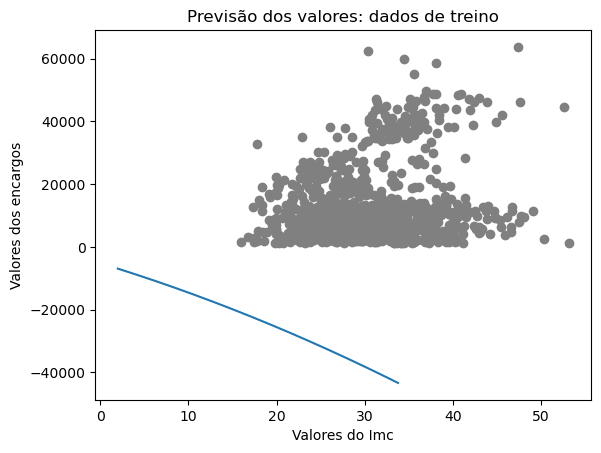

In [554]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("Valores do Imc")
plt.ylabel("Valores dos encargos")
plt.title("Previsão dos valores: dados de treino")
plt.plot(numeros1, valor1);

In [557]:
# Fazendo previsões para valores distintos
Imc = 33.77
valor2 = -5189.52 + 857.96*Imc - (8*Imc**2)
valor2

14660.486

In [560]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

0.03384003188808982

**TESTE**

In [577]:
numeros2 = np.linspace(2,33.77,402)

In [568]:
numeros2.shape

(402,)

In [575]:
valor2 = -5189.52 + 857.96*numeros2 - (8*numeros2**2)

In [580]:
import matplotlib.pyplot as plt

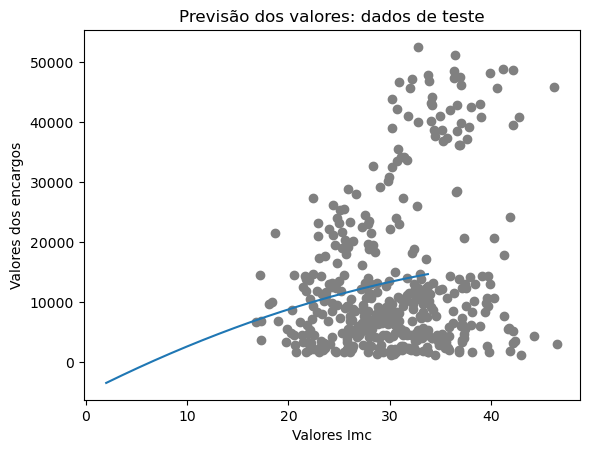

In [583]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("Valores Imc")
plt.ylabel("Valores dos encargos")
plt.title("Previsão dos valores: dados de teste")
plt.plot(numeros2, valor2);

**MÉTRICAS DE DESEMPENHO**

In [589]:
prev_y = -5189.52 + 857.96*x_teste -8*x_teste**2

In [592]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [595]:
mean_absolute_error(prev_y, y_teste)

9533.118764131841

In [598]:
mean_squared_error(prev_y, y_teste)

151220794.71315774

In [601]:
np.sqrt(mean_squared_error(prev_y,y_teste))

12297.18645516761

## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

## **REGRESSÃO POR VETORES DE SUPORTE**

In [611]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [616]:
independente = df3.iloc[:, 0:5].values
independente

array([[19, 0, 27.9, 0, 1],
       [18, 1, 33.77, 1, 0],
       [28, 1, 33.0, 3, 0],
       ...,
       [18, 0, 36.85, 0, 0],
       [21, 0, 25.8, 0, 0],
       [61, 0, 29.07, 0, 1]], dtype=object)

In [619]:
independente.shape

(1338, 5)

In [622]:
dependente = df3.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [625]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [628]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [630]:
 y_treino.shape, y_teste.shape

((936,), (402,))

In [633]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

SVR()

In [636]:
SVR.score(x_treino, y_treino)

-0.09420561531999971

In [639]:
SVR.score(x_teste, y_teste)

-0.08842732776913875

**Padronização de escala**

In [644]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [647]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872, -0.50466988],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872, -0.50466988],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402, -0.50466988],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872, -0.50466988],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872, -0.50466988],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417, -0.50466988]])

In [650]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [653]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [656]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417, -0.50466988],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417, -0.50466988],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038,  1.98149332],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872, -0.50466988],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417, -0.50466988],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872, -0.50466988]])

In [659]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [662]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
# .ravel() é para retornar matriz 1D
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

SVR()

In [665]:
SVR2.score(x_treino_scaler, y_treino_scaler)*100

83.74762871452832

**TESTE**

In [733]:
SVR2.score(x_teste_scaler, y_teste_scaler)*100

88.47451916323571

In [673]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-2.00695618e-01, -2.96136168e-01,  2.89300174e+00,  3.70561514e-02,
       -2.26835173e-01, -6.92063230e-01, -8.78995244e-01, -7.47164779e-02,
       -4.13233623e-01, -6.21089544e-01, -4.51039388e-01, -1.72625468e-01,
       -3.98230701e-01, -6.67145495e-01,  7.51935070e-01, -1.22677815e-01,
        9.06205071e-04, -7.68849740e-01, -5.01119119e-01,  1.02497570e+00,
        9.09081469e-01,  2.26401586e-02, -2.04636525e-01,  1.12997411e+00,
       -8.77444544e-01, -6.69324747e-01, -7.46527183e-01, -3.67829340e-01,
       -7.02356714e-01, -3.40312930e-01, -3.72077261e-01,  2.97703406e+00,
        7.11549382e-02, -1.53707913e-01,  1.10422899e-01, -7.17231401e-01,
       -3.16324930e-01,  2.20461765e+00,  2.04248362e+00, -8.60869902e-01,
       -6.07164674e-01, -7.77397574e-01,  7.69818310e-01,  3.02047605e+00,
        2.05048104e+00, -7.50240872e-01, -1.23792394e-01, -4.72626124e-01,
       -6.82133689e-01, -1.39329065e-03, -8.31406383e-01, -7.09275298e-01,
        1.27921946e+00,  

In [676]:
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

**Revertendo a transformação**

In [681]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [684]:
y_teste_inverse

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

**MÉTRICAS DE DESEMPENHO**

In [690]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [693]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

2205.8802496011313

In [696]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

18379622.641697206

In [699]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

4287.146211840367

### **Validação Cruzada**

**Padronização de escala**

In [706]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [709]:
independente_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663]])

In [712]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [714]:
dependente_scaler

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [717]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [720]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [723]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.90078394, 0.81967587, 0.88471081, 0.84119277, 0.84147199,
       0.74844356, 0.9110085 , 0.67311221, 0.83173572, 0.88566953,
       0.84395214, 0.85935973, 0.86295136, 0.83058454, 0.84265255])

In [726]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 83.85%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

**REGRESSÃO SVR**
- R^2 = Treino = 83.74, Teste = 88.47
- RMSE = 4287.14
- R^2 Validação Cruzada = 83.85%

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

In [739]:
df3.head(2)

Idade Sexo    Imc Dependentes Fumante regiao    Encargos
0     19    0  27.90           0       1      3  16884.9240
1     18    1  33.77           1       0      2   1725.5523

In [742]:
independente = df3.iloc[:, 0:5].values
independente

array([[19, 0, 27.9, 0, 1],
       [18, 1, 33.77, 1, 0],
       [28, 1, 33.0, 3, 0],
       ...,
       [18, 0, 36.85, 0, 0],
       [21, 0, 25.8, 0, 0],
       [61, 0, 29.07, 0, 1]], dtype=object)

In [746]:
independente.shape

(1338, 5)

In [744]:
dependente = df3.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [748]:
dependente.shape

(1338,)

In [751]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [754]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [758]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [761]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [766]:
arvore.score(x_treino, y_treino)*100

87.33204528318532

**TESTE**

In [771]:
arvore.score(x_teste, y_teste)*100

84.20667783377726

In [774]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([11839.80721163, 10729.79101495, 41896.67127447, 15240.29968833,
       10729.79101495,  6937.80409772,  3064.76344858,  9672.47997611,
        6937.80409772,  6787.78754259,  6937.80409772, 10729.79101495,
       10729.79101495,  6937.80409772, 19099.57786744, 10729.79101495,
       15240.29968833,  4528.30711673,  6937.80409772, 33705.2506    ,
       24582.06236882, 14800.61554821, 11839.80721163, 26745.56683125,
        3064.76344858,  6787.78754259,  4051.15793679,  6937.80409772,
        4051.15793679, 10729.79101495,  6937.80409772, 46847.68208429,
       15240.29968833, 11839.80721163, 19099.57786744,  4051.15793679,
        8287.94695333, 41405.620994  , 41896.67127447,  3064.76344858,
        6937.80409772,  4051.15793679, 19099.57786744, 46847.68208429,
       37517.02964286,  3064.76344858, 10729.79101495,  6937.80409772,
        6787.78754259, 11839.80721163,  4528.30711673,  3064.76344858,
       26745.56683125, 46847.68208429, 11839.80721163,  4051.15793679,
      

In [777]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**MÉTRICAS DE DESEMPENHO**

In [782]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [785]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2699.082874482908

In [788]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

25185526.38151094

In [791]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

5018.518345240051

### **Validação Cruzada**

In [796]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [799]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [802]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92337503, 0.83814179, 0.88729394, 0.76883527, 0.87502829,
       0.77437451, 0.89994819, 0.63250802, 0.85211118, 0.83780069,
       0.80904502, 0.85314058, 0.85987504, 0.84085724, 0.84787169])

In [805]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.33%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

**REGRESSÃO SVR**
- R^2 = Treino = 83.74, Teste = 88.47
- RMSE = 4287.14
- R^2 Validação Cruzada = 83.85%

**REGRESSÃO COM ÁRVORE DE DECISÃO**
- R^2 = Treino = 87.33, Teste = 84.20
- RMSE = 5018.51
- R^2 Validação Cruzada = 83.33%

## **REGRESSÃO COM RANDOM FOREST**

In [816]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [819]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [822]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [830]:
from sklearn.ensemble import RandomForestRegressor

In [835]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [837]:
random.score(x_treino, y_treino)*100

88.07298461192583

**TESTE**

In [842]:
random.score(x_teste, y_teste)*100

88.5758528392349

In [845]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([12086.88971155, 10949.94442776, 44829.15661609, 14041.60079461,
       11376.45260545,  7367.6290963 ,  2594.0890186 , 12284.49177387,
        7335.46767019,  6286.38519487,  7315.47912147, 12998.38063898,
        9332.67947364,  6173.9656047 , 21718.84991568, 12439.11210417,
       14284.56710661,  4929.28439355,  7156.42551337, 34966.03001214,
       24149.53902814, 14673.72235786, 11997.58709346, 27062.54628296,
        3316.82691242,  6262.02330198,  5565.77561802,  7326.9637567 ,
        4925.0231605 ,  9761.29660533,  7158.19635206, 46122.80673875,
       14041.60079461, 11971.36129309, 17403.30843041,  5047.52986657,
        9806.83986575, 37925.34148231, 40468.88328077,  3372.30584277,
        7204.74931945,  5239.8127045 , 19677.3322701 , 46056.41344418,
       37963.72958055,  4049.49307851, 12439.11210417,  7077.28312497,
        5741.40291316, 12678.0802554 ,  3923.33935616,  3706.08587225,
       25932.37143314, 46520.9450977 , 11735.45579266,  5783.76075368,
      

In [848]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**MÉTRICAS DE DESEMPENHO**

In [853]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [856]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2494.7661402115923

In [858]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

18218026.370605417

In [860]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4268.258001879152

### **Validação Cruzada**

In [865]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [868]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [871]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9240807 , 0.83745051, 0.90030154, 0.82313304, 0.88146637,
       0.77350697, 0.92491156, 0.66489598, 0.85214296, 0.86945126,
       0.83248568, 0.86520398, 0.8718813 , 0.84988856, 0.85978833])

In [874]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 84.87%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

**REGRESSÃO SVR**
- R^2 = Treino = 83.74, Teste = 88.47
- RMSE = 4287.14
- R^2 Validação Cruzada = 83.85%

**REGRESSÃO COM ÁRVORE DE DECISÃO**
- R^2 = Treino = 87.33, Teste = 84.20
- RMSE = 5018.51
- R^2 Validação Cruzada = 83.33%

**REGRESSÃO COM RANDOM FOREST**
- R^2 = Treino = 88.07, Teste = 88.57
- RMSE = 4268.25
- R^2 Validação Cruzada = 84.87%

## **REGRESSÃO COM XGBOOST**

In [881]:
from xgboost import XGBRegressor

In [884]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [889]:
xgboost.score(x_treino, y_treino)*100

88.37906516310579

**TESTE**

In [895]:
xgboost.score(x_teste, y_teste)*100

88.92898930411474

## **Previsões XGBOOST**

In [909]:
# Fazendo previsões para valores distintos
data = {'Idade': 19, 'Sexo': 0, 'Imc': 27.00, 'Dependentes': 0, 'Fumante': 0}
features = [data['Idade'], data['Sexo'], data['Imc'], data['Dependentes'], data['Fumante']]
Encargos = xgboost.predict([features])
print(f"Encargos previstos: {Encargos[0]:,.2f}")

Encargos previstos: 3,322.91


In [911]:
features = pd.DataFrame([features], columns=['Idade', 'Sexo', 'Imc', 'Dependentes', 'Fumante'])
features

Idade  Sexo   Imc  Dependentes  Fumante
0     19     0  27.0            0        0

In [913]:
previsão = pd.DataFrame(Encargos, columns=['Encargos'] )
previsão['Encargos'] = previsão['Encargos'].apply(lambda x: f"{x:,.2f}")
previsão

Encargos
0  3,322.91

In [915]:
formatacao = pd.concat([features, previsão], axis=1)
formatacao

Idade  Sexo   Imc  Dependentes  Fumante  Encargos
0     19     0  27.0            0        0  3,322.91

**MÉTRICAS DE DESEMPENHO**

In [920]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [923]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2494.7661402115923

In [926]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4268.258001879152

### **Validação Cruzada**

In [931]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [934]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [937]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92686167, 0.83251455, 0.89682821, 0.83084247, 0.87426176,
       0.77579002, 0.92542941, 0.6893266 , 0.84937727, 0.88126365,
       0.85127319, 0.87471794, 0.87469208, 0.85989511, 0.86381372])

In [940]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 85.38%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

**REGRESSÃO SVR**
- R^2 = Treino = 83.74, Teste = 88.47
- RMSE = 4287.14
- R^2 Validação Cruzada = 83.85%

**REGRESSÃO COM ÁRVORE DE DECISÃO**
- R^2 = Treino = 87.33, Teste = 84.20
- RMSE = 4268.25
- R^2 Validação Cruzada = 83.33%
  
**REGRESSÃO COM XGBOOST**
- R^2 = Treino = 88.37, Teste = 88.92
- RMSE = 5018.51
- R^2 Validação Cruzada = 85.38%

## **REGRESSÃO COM CATBOOST**

In [947]:
from catboost.core import CatBoostRegressor

In [950]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

0:	learn: 11153.3413678	total: 141ms	remaining: 14s
1:	learn: 10522.3623124	total: 142ms	remaining: 6.98s
2:	learn: 9928.2122577	total: 143ms	remaining: 4.63s
3:	learn: 9408.3635320	total: 144ms	remaining: 3.46s
4:	learn: 8934.1267403	total: 145ms	remaining: 2.76s
5:	learn: 8504.3495112	total: 146ms	remaining: 2.29s
6:	learn: 8105.8710934	total: 147ms	remaining: 1.96s
7:	learn: 7742.7286505	total: 149ms	remaining: 1.71s
8:	learn: 7424.9710560	total: 150ms	remaining: 1.52s
9:	learn: 7147.4021587	total: 151ms	remaining: 1.36s
10:	learn: 6871.7687148	total: 152ms	remaining: 1.23s
11:	learn: 6623.6960246	total: 153ms	remaining: 1.12s
12:	learn: 6411.7903020	total: 154ms	remaining: 1.03s
13:	learn: 6203.6160951	total: 155ms	remaining: 952ms
14:	learn: 6037.4299896	total: 156ms	remaining: 886ms
15:	learn: 5871.6823008	total: 157ms	remaining: 825ms
16:	learn: 5725.4037697	total: 159ms	remaining: 774ms
17:	learn: 5593.6655566	total: 160ms	remaining: 728ms
18:	learn: 5479.5277141	total: 161ms	r

In [955]:
catboost.score(x_treino, y_treino)*100

87.15651240471998

**TESTE**

In [960]:
catboost.score(x_teste, y_teste)*100

89.29227248644905

In [963]:
previsoes_teste = catboost.predict(x_teste)

## **Previsões CATBOOST**

In [970]:
# Fazendo previsões para valores distintos
data = {'Idade': 19, 'Sexo': 0, 'Imc': 27.00, 'Dependentes': 0, 'Fumante': 0}
features = [data['Idade'], data['Sexo'], data['Imc'], data['Dependentes'], data['Fumante']]
Encargos = catboost.predict([features])
print(f"Encargos previstos: {Encargos[0]:,.2f}")

Encargos previstos: 3,176.61


In [972]:
features = pd.DataFrame([features], columns=['Idade', 'Sexo', 'Imc', 'Dependentes', 'Fumante'])
features

Idade  Sexo   Imc  Dependentes  Fumante
0     19     0  27.0            0        0

In [974]:
previsão = pd.DataFrame(Encargos, columns=['Encargos'] )
previsão['Encargos'] = previsão['Encargos'].apply(lambda x: f"{x:,.2f}")
previsão

Encargos
0  3,176.61

In [976]:
formatacao = pd.concat([features, previsão], axis=1)
formatacao

Idade  Sexo   Imc  Dependentes  Fumante  Encargos
0     19     0  27.0            0        0  3,176.61

**MÉTRICAS DE DESEMPENHO**

In [981]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [984]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2418.2976387012754

In [987]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4132.2579531356605

### **Validação Cruzada**

In [992]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [995]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [998]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

0:	learn: 11314.8700762	total: 2.14ms	remaining: 212ms
1:	learn: 10647.9739333	total: 3.53ms	remaining: 173ms
2:	learn: 10018.7439732	total: 5.04ms	remaining: 163ms
3:	learn: 9464.5320697	total: 6.54ms	remaining: 157ms
4:	learn: 8933.5826581	total: 8.32ms	remaining: 158ms
5:	learn: 8483.8535409	total: 9.78ms	remaining: 153ms
6:	learn: 8065.2602658	total: 11.5ms	remaining: 153ms
7:	learn: 7683.8242457	total: 12.5ms	remaining: 144ms
8:	learn: 7331.2456019	total: 13.6ms	remaining: 138ms
9:	learn: 7052.3050348	total: 14.6ms	remaining: 131ms
10:	learn: 6767.8900630	total: 15.4ms	remaining: 125ms
11:	learn: 6505.2526166	total: 16.4ms	remaining: 120ms
12:	learn: 6288.2419017	total: 17.6ms	remaining: 118ms
13:	learn: 6076.0899652	total: 18.6ms	remaining: 114ms
14:	learn: 5900.0840990	total: 19.5ms	remaining: 111ms
15:	learn: 5730.9791490	total: 20.2ms	remaining: 106ms
16:	learn: 5586.6421926	total: 21.5ms	remaining: 105ms
17:	learn: 5454.8693738	total: 22.7ms	remaining: 103ms
18:	learn: 5340.0

array([0.92154921, 0.82895433, 0.88643776, 0.85164075, 0.87739609,
       0.77136421, 0.92333775, 0.67501957, 0.8430391 , 0.88476583,
       0.85290778, 0.87293432, 0.87704121, 0.85523358, 0.85702763])

In [1001]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 85.19%


## **RESULTADO:**
**REGRESSÃO LINEAR SIMPLES**: 
- R^2 = Treino = 0.61, Teste = 0.03
- RMSE = 7026.60
- R^2 Validação Cruzada = 60.69%

**REGRESSÃO LINEAR MÚLTIPLA**
- R^2 = Treino = 0.73, Teste = 0.78
- RMSE = 5794.10
- R^2 Validação Cruzada = 73.51%

**REGRESSÃO POLINOMIAL**
- R^2 = Treino = 0.03
- RMSE = 12297.18

**REGRESSÃO SVR**
- R^2 = Treino = 83.74, Teste = 88.47
- RMSE = 4287.14
- R^2 Validação Cruzada = 83.85%

**REGRESSÃO COM ÁRVORE DE DECISÃO**
- R^2 = Treino = 87.33, Teste = 84.20
- RMSE = 4268.25
- R^2 Validação Cruzada = 83.33%
  
**REGRESSÃO COM XGBOOST**
- R^2 = Treino = 88.37, Teste = 88.92
- RMSE = 5018.51
- R^2 Validação Cruzada = 85.38%
**REGRESSÃO COM CATBOOST**
- R^2 = Treino = 87.15, Teste = 89.29
- RMSE = 4268.25
- R^2 Validação Cruzada = 85.19%

## **ALGORITMO VENCEDOR**

**REGRESSÃO COM XGBOOST**
- R^2 = Treino = 88.37, Teste = 88.92
- RMSE = 5018.51
- R^2 Validação Cruzada = 85.38%

## **DESENVOLVIMENTO APP USANDO O ALGORITMO: XGBOOST** 

In [1041]:
# Solicitar os valores ao usuário
data['Idade'] = int(input("Digite a idade: "))
data['Sexo'] = int(input("Digite o sexo (0 para feminino, 1 para masculino): "))
data['Imc'] = float(input("Digite o IMC: "))
data['Dependentes'] = int(input("Digite o número de dependentes: "))
data['Fumante'] = int(input("Digite se é fumante (0 para não, 1 para sim): "))

Digite a idade:  25
Digite o sexo (0 para feminino, 1 para masculino):  0
Digite o IMC:  19.6
Digite o número de dependentes:  1
Digite se é fumante (0 para não, 1 para sim):  1


In [1043]:
print(data)

{'Idade': 25, 'Sexo': 0, 'Imc': 19.6, 'Dependentes': 1, 'Fumante': 1}


In [1045]:
# Fazendo previsões para valores distintos
features = [data['Idade'], data['Sexo'], data['Imc'], data['Dependentes'], data['Fumante']]
Encargos = catboost.predict([features])
print(f"Encargos previstos: {Encargos[0]:,.2f}")

Encargos previstos: 16,946.84


In [1047]:
features = pd.DataFrame([features], columns=['Idade', 'Sexo', 'Imc', 'Dependentes', 'Fumante'])
features

Idade  Sexo   Imc  Dependentes  Fumante
0     25     0  19.6            1        1

In [1049]:
previsão = pd.DataFrame(Encargos, columns=['Encargos'] )
previsão['Encargos'] = previsão['Encargos'].apply(lambda x: f"{x:,.2f}")
previsão

Encargos
0  16,946.84

In [1051]:
formatacao = pd.concat([features, previsão], axis=1)
formatacao

Idade  Sexo   Imc  Dependentes  Fumante   Encargos
0     25     0  19.6            1        1  16,946.84